# Project 2 (Gradient Boosting) - Car Price Prediction

### Project Description 
The client company which distributes automobiles, is developing an application for lead generation at the moment. The objective of data science project is to build a machine learning model for defining a car price in order to put a correct price to the app.

### Project Design

- Data quality evaluation, data pre-processing.
- As a quality metric we use RMSE.
- For modeling we use the Python library ***lightGBM*** for **gradient boosting**.

- For gradient boosting we use built-in Python  library LightGBM.


### Features in the data

•	DateCrawled — date of downloading the profile from the database

•	VehicleType — vehicle body type

•	RegistrationYear — year of vehicle registration

•	Gearbox — type of gearbox

•	Power — power (hp)

•	Model — car model

•	Kilometer — mileage (km)

•	RegistrationMonth — month of vehicle registration

•	FuelType — type of fuel

•	Brand — car brand

•	NotRepaired — Was the car under repair? Yes / No

•	DateCreated — date of creation of the questionnaire

•	NumberOfPictures — the number of photos of the car

•	PostalCode — postal code of the owner of the questionnaire (user)

•	LastSeen — date of last user activity

### Target 
- price - price of the car (in euro)

In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.metrics import roc_auc_score


import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

from sklearn import tree, metrics, ensemble, neural_network, naive_bayes, neighbors
# ensemble for RF
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.svm import SVC

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

# 1 - Data pre-processing

In [7]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/02_LA_CarPricePrediction/autos.csv')

In [8]:
data.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [9]:
data.shape

(354369, 16)

## 1.1 Loading and understanding the data

In [10]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pandas_profiling import ProfileReport

In [12]:
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.2 Checking the dataset for missing values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

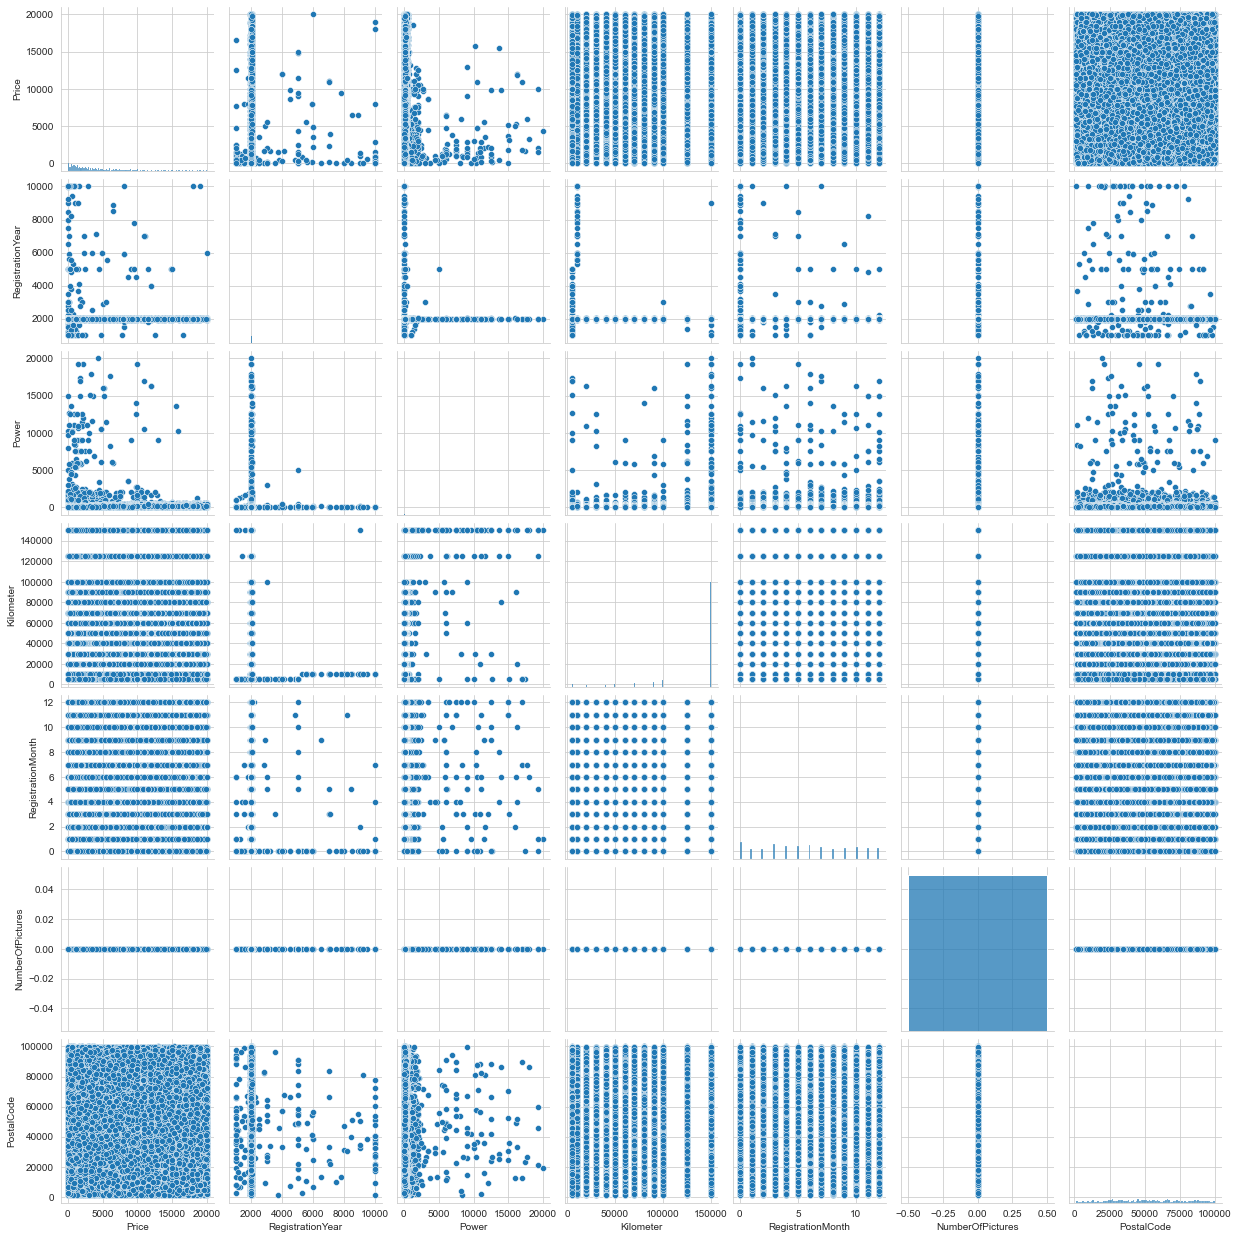

In [14]:
sb.pairplot(data);

In [15]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Conclusion: as long as there are categorical data which contains missing, it is reasonable to fill the missings out by the most frequent values in each column ('mode').

In [16]:
data["VehicleType"] = data["VehicleType"].fillna(data["VehicleType"].mode().values[0])
data["Gearbox"] = data["Gearbox"].fillna(data["Gearbox"].mode().values[0])
data["Model"] = data["Model"].fillna(data["Model"].mode().values[0])
data["FuelType"] = data["FuelType"].fillna(data["FuelType"].mode().values[0])

# если ячейка не заполнена, логично предположить, что ремонта не было - пропуски заполняем 'no'
data["Repaired"] = data["Repaired"].fillna("no")

In [17]:
# checking the results
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Conclusion: missings are gone, we can proceed.

## 1.3 Checking for dublicates

In [18]:
# taking the columns names' list
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [19]:
check_col = ['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen']
for col in check_col:
    print(col, pd.Series(data[col].unique()).duplicated().sum())

DateCrawled 0
Price 0
VehicleType 0
RegistrationYear 0
Gearbox 0
Power 0
Model 0
Kilometer 0
RegistrationMonth 0
FuelType 0
Brand 0
Repaired 0
DateCreated 0
NumberOfPictures 0
PostalCode 0
LastSeen 0


In [20]:
data.duplicated().sum()

5

In [21]:
data = data.drop_duplicates()

In [22]:
data.duplicated().sum()

0

#### Conclusion: dublicates are gone, we can proceed.

### 1.3.1 Removing the columns, which are needed for modelling

In [23]:
data_final = data.copy()

In [24]:
data_final = data_final.drop(['DateCrawled','DateCreated','LastSeen','NumberOfPictures','PostalCode'],axis = 1)

In [25]:
data_final.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired'],
      dtype='object')

In [26]:
# lowering all string names in the dataset
data_final.columns = data_final.columns.str.lower()

In [27]:
data_final.head()

price vehicletype  registrationyear gearbox  power  model  kilometer  \
0    480       sedan              1993  manual      0   golf     150000   
1  18300       coupe              2011  manual    190   golf     125000   
2   9800         suv              2004    auto    163  grand     125000   
3   1500       small              2001  manual     75   golf     150000   
4   3600       small              2008  manual     69  fabia      90000   

   registrationmonth  fueltype       brand repaired  
0                  0    petrol  volkswagen       no  
1                  5  gasoline        audi      yes  
2                  8  gasoline        jeep       no  
3                  6    petrol  volkswagen       no  
4                  7  gasoline       skoda       no

In [28]:
data_final.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'repaired'],
      dtype='object')

In [29]:
# checking the current output
temp = data_final.copy() 
list_c = ['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'repaired']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354364 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354364 non-null  int64 
 1   vehicletype        354364 non-null  object
 2   registrationyear   354364 non-null  int64 
 3   gearbox            354364 non-null  object
 4   power              354364 non-null  int64 
 5   model              354364 non-null  object
 6   kilometer          354364 non-null  int64 
 7   registrationmonth  354364 non-null  int64 
 8   fueltype           354364 non-null  object
 9   brand              354364 non-null  object
 10  repaired           354364 non-null  object
dtypes: int64(5), object(6)
memory usage: 32.4+ MB
None
-------------------------
price [    0     1     2 ... 19998 19999 20000]
price : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
vehicletype ['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'su

fueltype ['cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol']
fueltype : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
brand ['alfa_romeo' 'audi' 'bmw' 'chevrolet' 'chrysler' 'citroen' 'dacia'
 'daewoo' 'daihatsu' 'fiat' 'ford' 'honda' 'hyundai' 'jaguar' 'jeep' 'kia'
 'lada' 'lancia' 'land_rover' 'mazda' 'mercedes_benz' 'mini' 'mitsubishi'
 'nissan' 'opel' 'peugeot' 'porsche' 'renault' 'rover' 'saab' 'seat'
 'skoda' 'smart' 'sonstige_autos' 'subaru' 'suzuki' 'toyota' 'trabant'
 'volkswagen' 'volvo']
brand : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
repaired ['no' 'yes']
repaired : кол-во NaN 0 , процент NaN 0.0 %


#### Conclusion: good, the dataset is clean, we can proceed.

## 1.4 Working with outliers

In [30]:
data_final.describe()

price  registrationyear          power      kilometer  \
count  354364.000000     354364.000000  354364.000000  354364.000000   
mean     4416.655608       2004.234471     110.093723  128211.373051   
std      4514.159690         90.228593     189.851590   37905.136957   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       registrationmonth  
count      354364.000000  
mean            5.714641  
std             3.726433  
min             0.000000  
25%             3.000000  
50%             6.000000  
75%             9.000000  
max            12.000000

In [31]:
# renaming some columns' names

data_final = data_final.rename(columns={
    'vehicletype' : 'vehicle_type', 
    'registrationyear' : 'reg_year', 
       'kilometer': 'km', 
    'registrationmonth' : 'reg_month', 
    'fueltype': 'fuel_type'
})

In [32]:
data_final.describe()

price       reg_year          power             km  \
count  354364.000000  354364.000000  354364.000000  354364.000000   
mean     4416.655608    2004.234471     110.093723  128211.373051   
std      4514.159690      90.228593     189.851590   37905.136957   
min         0.000000    1000.000000       0.000000    5000.000000   
25%      1050.000000    1999.000000      69.000000  125000.000000   
50%      2700.000000    2003.000000     105.000000  150000.000000   
75%      6400.000000    2008.000000     143.000000  150000.000000   
max     20000.000000    9999.000000   20000.000000  150000.000000   

           reg_month  
count  354364.000000  
mean        5.714641  
std         3.726433  
min         0.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

***Conclusion:*** 
- the median heavily differ from the mean value in the colum 'price', which mean there are signifincat outliers in the column;

- also, the column 'reg_year' contains wierd values like 1000, which is not possible for the registration year value;

- also, the column 'power' contains outliers, since it is not possible to have a car with power = 0.

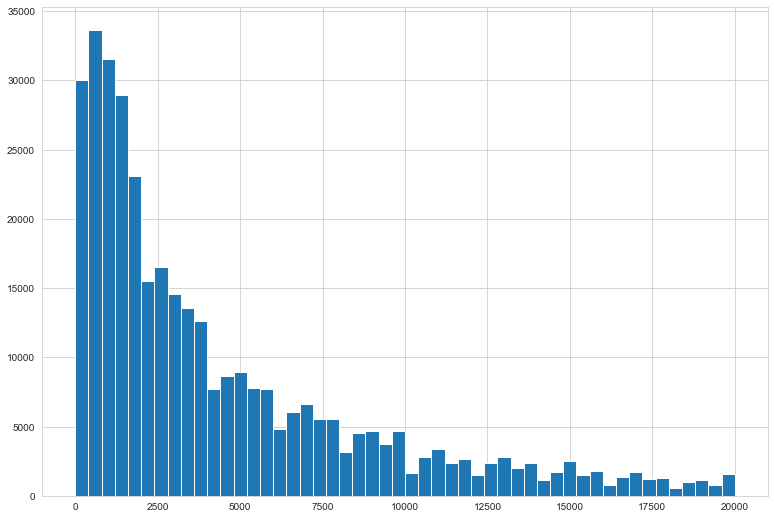

In [33]:
data_final['price'].hist(bins=50, figsize=(13, 9));

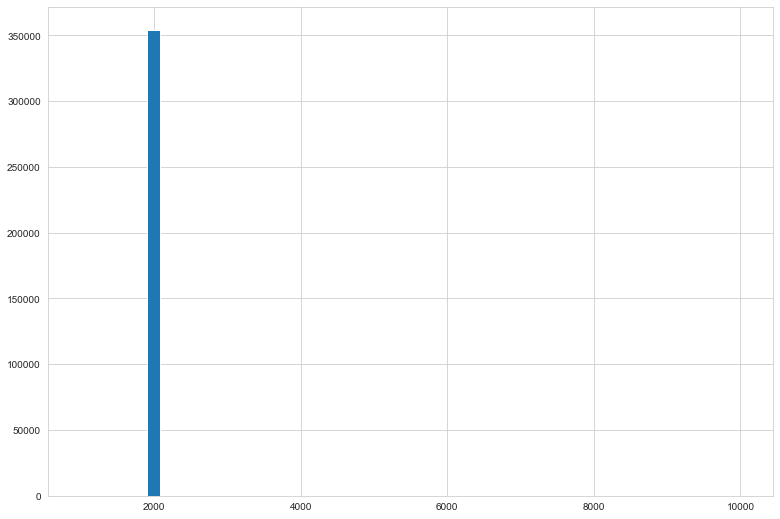

In [34]:
data_final['reg_year'].hist(bins=50, figsize=(13, 9));

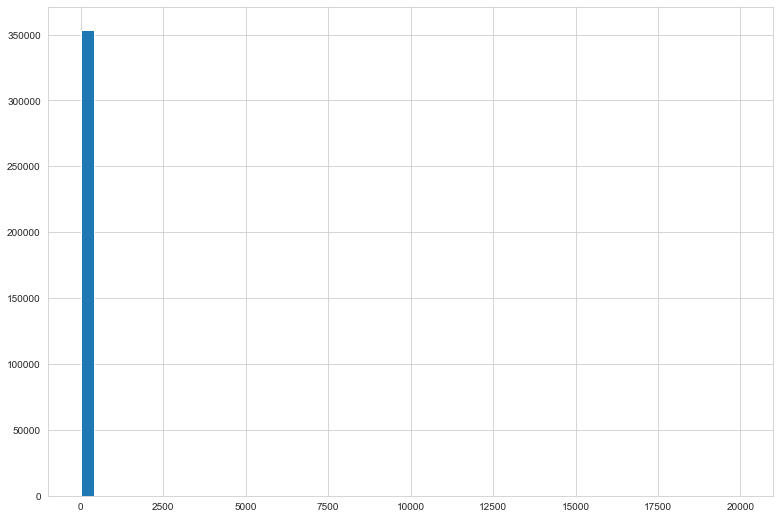

In [35]:
data_final['power'].hist(bins=50, figsize=(13, 9));

### 1.5  Removing outliers in 'price' and 'power' columns

In [36]:
# writing a function for outliers removal
def remove_ouliers(data, column):
    q25=np.array(data[column].quantile(0.25))
    
    q75=np.array(data[column].quantile(0.75))
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    del_index = []
    for index_value, value in zip(data[column].index, data[column]):
        if second_part <= value or value <= first_part:
            del_index.append(index_value)
    
    print('Number of rows for removal:' + str(column)+":",
          len(del_index))
    return del_index

In [37]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].min())

0


In [38]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].max())

20000


In [39]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].mode())

0    0
dtype: int64


In [40]:
# filling the ouliers in column 'power'
data_final.loc[data_final['power'] > 3500, 'power'] = 3500
data_final.loc[data_final['power'] < 100, 'power'] = 100

In [41]:
# removing outliers

array_num_col = ['price', 'power']
count = 0 
for column in array_num_col:
    index_del = remove_ouliers(data_final, column)
    count += len(index_del)
    data_final = data_final.drop(index_del,axis = 0)
print('Removed:', count)

Number of rows for removal:price: 18979
Number of rows for removal:power: 18761
Removed: 37740


### 1.6  Removing outliers in 'reg_year' and 'reg_month' columns

In [42]:
# reg_year [2016 : 2022]
def reg_year_outliers(value):
    if value >= 2022:
        return 2022
    elif value <=2016:
        return 2016
    else:
        return value

In [43]:
# reg_year
data_final['reg_year'] = data_final['reg_year'].apply(reg_year_outliers)

In [44]:
# reg_month
data_final.loc[data_final['reg_month'] == 0, 'reg_month'] = 1

In [45]:
data_final.describe()

price       reg_year          power             km  \
count  316624.000000  316624.000000  316624.000000  316624.000000   
mean     3481.164368    2016.056629     117.407486  129705.660342   
std      3305.724332       0.293748      25.274596   36734.881748   
min         0.000000    2016.000000     100.000000    5000.000000   
25%       999.000000    2016.000000     100.000000  125000.000000   
50%      2300.000000    2016.000000     101.000000  150000.000000   
75%      4999.000000    2016.000000     131.000000  150000.000000   
max     14400.000000    2022.000000     199.000000  150000.000000   

           reg_month  
count  316624.000000  
mean        5.766534  
std         3.583524  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

### 1.7  Проверим признаки на мультиколлинеарность

In [46]:
data_final.corr()

price  reg_year     power        km  reg_month
price      1.000000 -0.041873  0.369308 -0.307265   0.106111
reg_year  -0.041873  1.000000 -0.049661 -0.002991  -0.046121
power      0.369308 -0.049661  1.000000  0.133318   0.066036
km        -0.307265 -0.002991  0.133318  1.000000   0.013966
reg_month  0.106111 -0.046121  0.066036  0.013966   1.000000

# 2  Обучение моделей

### 2.1 Spliting the data into three subsamples for three different purposes: training and testing.

```
As a benchmark, we split the sample in the proportion as follows:
- 60% train_data
- 20% validation_data
- 20% test_data

```

In [47]:
train_data, other_data = train_test_split(data_final, test_size=0.30, random_state=5)
validation_data, test_data = train_test_split(other_data, test_size=0.70, random_state=5)

print('Train sample size:', train_data.shape[0])
print('Validation sample size:', validation_data.shape[0])
print('Test sample size:', test_data.shape[0])

Train sample size: 221636
Validation sample size: 28496
Test sample size: 66492


### 2.2 Coding variables using OHE process as long as we are having _linear models_

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

Check out [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?ref=hackernoon.com) for more details about OHE.

***Applying OHE and saving a new dataset for further analysis. Also, trying to use OrdinalEncoder() to reduce the execution time.***

In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
train_data_ohe = pd.get_dummies(train_data, drop_first=True)
validation_data_ohe = pd.get_dummies(validation_data, drop_first=True)
test_data_ohe = pd.get_dummies(test_data, drop_first=True)

<div class="alert alert-block alert-warning">
<b>FYI</b>
    
OHE coding better to do after data split, not before. Otherwise, there can be data leakage.

More about data leakage: https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage

In [50]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки
X_train = train_data_ohe.drop(['price'], axis=1)
y_train = train_data_ohe['price']

X_valid = validation_data_ohe.drop(['price'], axis=1)
y_valid = validation_data_ohe['price']

X_test = test_data_ohe.drop(['price'], axis=1)
y_test = test_data_ohe['price']

In [51]:
print('Train features sample size:', X_train.shape[0])
print('Train target sample size:', y_train.shape[0])
print()
print('Test features sample size:', X_test.shape[0])
print('Test target sample size:', y_test.shape[0])

Train features sample size: 221636
Train target sample size: 221636

Test features sample size: 66492
Test target sample size: 66492


In [52]:
print('Validation features sample size:', X_valid.shape[0])
print('Validation target sample size:', y_valid.shape[0])

Validation features sample size: 28496
Validation target sample size: 28496


### 2.3  Coding categorical variables with OrdinalEncoder()

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
ord_enc = OrdinalEncoder()

In [55]:
# coding only categorical variables
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221636 entries, 293759 to 333391
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         221636 non-null  int64 
 1   vehicle_type  221636 non-null  object
 2   reg_year      221636 non-null  int64 
 3   gearbox       221636 non-null  object
 4   power         221636 non-null  int64 
 5   model         221636 non-null  object
 6   km            221636 non-null  int64 
 7   reg_month     221636 non-null  int64 
 8   fuel_type     221636 non-null  object
 9   brand         221636 non-null  object
 10  repaired      221636 non-null  object
dtypes: int64(5), object(6)
memory usage: 20.3+ MB


In [56]:
train_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(train_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [57]:
validation_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(validation_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [58]:
test_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(test_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [59]:
# after Ordinal Encoding we can split the dataset for further modeling

# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки
X_train_ord = train_data.drop(['price'], axis=1)
y_train_ord = train_data['price']

X_valid_ord = validation_data.drop(['price'], axis=1)
y_valid_ord = validation_data['price']

X_test_ord = test_data.drop(['price'], axis=1)
y_test_ord = test_data['price']

### 2.4  Preparing dataset for gradient boosting

In [60]:
# preparing dataset for gradient boosting models
data_boost = data_final.copy()
data_boost = data_boost.astype({'vehicle_type' : 'category',
                                                'gearbox' : 'category',
                                                'model' : 'category',
                                                'fuel_type' : 'category',
                                                'brand' : 'category',
                                                'repaired' : 'category'})

In [61]:
# data_cat_features = data_cat.drop(['price'], axis=1)
# data_cat_target = data_cat['price']

In [62]:
train_data_boost, other_data_boost = train_test_split(data_boost, test_size=0.30, random_state=5)
validation_data_boost, test_data_boost = train_test_split(other_data_boost, test_size=0.70, random_state=5)

print('Train sample size:', train_data_boost.shape[0])
print('Validation sample size:', validation_data_boost.shape[0])
print('Test sample size:', test_data_boost.shape[0])

Train sample size: 221636
Validation sample size: 28496
Test sample size: 66492


In [63]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки - для градиентного бустинга
X_train_boost = train_data_boost.drop(['price'], axis=1)
y_train_boost = train_data_boost['price']

X_valid_boost = validation_data_boost.drop(['price'], axis=1)
y_valid_boost = validation_data_boost['price']

X_test_boost = test_data_boost.drop(['price'], axis=1)
y_test_boost = test_data_boost['price']

print('Train features sample size:', X_train_boost.shape[0])
print('Test target sample size:', y_train_boost.shape[0])
print()
print('Validation features sample size:', X_valid_boost.shape[0])
print('Validation target sample size:', y_valid_boost.shape[0])
print()
print('Test features sample size:', X_test_boost.shape[0])
print('Test target sample size:', y_test_boost.shape[0])

Train features sample size: 221636
Test target sample size: 221636

Validation features sample size: 28496
Validation target sample size: 28496

Test features sample size: 66492
Test target sample size: 66492


In [64]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки - для градиентного бустинга
X_train_boost = train_data_boost.drop(['price'], axis=1)
y_train_boost = train_data_boost['price']

X_valid_boost = validation_data_boost.drop(['price'], axis=1)
y_valid_boost = validation_data_boost['price']

X_test_boost = test_data_boost.drop(['price'], axis=1)
y_test_boost = test_data_boost['price']

print('Train features sample size:', X_train_boost.shape[0])
print('Test target sample size:', y_train_boost.shape[0])
print()
print('Validation features sample size:', X_valid_boost.shape[0])
print('Validation target sample size:', y_valid_boost.shape[0])
print()
print('Test features sample size:', X_test_boost.shape[0])
print('Test target sample size:', y_test_boost.shape[0])

Train features sample size: 221636
Test target sample size: 221636

Validation features sample size: 28496
Validation target sample size: 28496

Test features sample size: 66492
Test target sample size: 66492


#### Conclusion: data was split into 6 subsamples 60/20/20 for training and testing purposes.

## 2.3  Обучение моделей

#### 0) CatBoost

In [87]:
# del data_ohe_features

In [88]:
# %%time
# # catboost
# catboost = CatBoostRegressor(loss_function='RMSE')
# parameters_cat = {'depth':[5,10], 'learning_rate':np.arange(0.1,1,0.2)}
# catboost_grid = catboost.grid_search(parameters_cat,
#             Pool(X_train_cat, y_train_cat, cat_features=['vehicle_type',
#                                                 'gearbox',
#                                                 'model',
#                                                 'fuel_type',
#                                                 'brand',
#                                                 'repaired']),
#             cv=3,
#             verbose=True,
#             plot=False)

In [89]:
# catboost_grid['params']

In [90]:
# %%time
# final_cat = CatBoostRegressor(depth=catboost_grid['params']['depth'], 
#                               learning_rate=catboost_grid["params"]['learning_rate'],
#                               loss_function='RMSE',verbose=100)
# final_cat.fit(Pool(X_train_cat, y_train_cat,
#                    cat_features=['vehicle_type',
#                                                 'gearbox',
#                                                 'model',
#                                                 'fuel_type',
#                                                 'brand',
#                                                 'repaired']))

#### Сравним, как обучаются модели Decision Tree Regressor, Random Forest Regressor, Dummy Regressor, lightGBM. 

**Using GridSearchCV in order to find best possible hyperparameters for the models - Decision Tree (DT), Random Forest (RF), Dummy Regressor, lightGBM for gradient boosting.**

#### 1)  Initiating and building Decision Tree model

In [160]:
from sklearn import tree, metrics, ensemble, neural_network, naive_bayes, neighbors

In [161]:
%%time
# Decision Tree
parameters_dt = {
    'max_depth': [2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
dt = DecisionTreeRegressor()
grid_DT = GridSearchCV(dt, param_grid=parameters_dt)
best_decision_tree_model = grid_DT.fit(X_train, y_train)
print('Best parameters for Decision Tree: {}'.format(grid_DT.best_params_))

Best parameters for Decision Tree Rougher: {'criterion': 'friedman_mse', 'max_depth': 5, 'splitter': 'best'}


#### 2) Initiating and building Random Forest Regressor model

In [ ]:
%%time
# RandomForest
parameters_rf = {
    'n_estimators': [5, 10, 20],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 7, 9]
}
rf_model = RandomForestRegressor()
grid_RF = GridSearchCV(rf_model, param_grid=parameters_rf)
best_random_forest_model = grid_RF.fit(X_train, y_train)
print('Best parameters for Random Forest: {}'.format(grid_RF.best_params_))

#### 3) DummyRegressor

In [94]:
from sklearn.dummy import DummyRegressor

In [3]:
%%time
# Dummy Regressor
parameters_dummy = {
    'strategy': ['mean', 'median', 'quantile', 'constant']
}
random_dummy = DummyRegressor()
grid_Dummy = GridSearchCV(random_dummy, param_grid=parameters_dummy)
best_dummy_model = grid_Dummy.fit(X_train, y_train)
print('Best parameters for Dummy Regressor: {}'.format(grid_Dummy.best_params_))

NameError: name 'GridSearchCV' is not defined

#### 4) lightGBM for gradient boosting

https://programmersought.com/article/40776531516/#LGBMRegressor_436

In [67]:
import lightgbm as ltb
from lightgbm import LGBMRegressor
from lightgbm import plot_importance

In [ ]:
model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    min_split_gain=0.0,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    silent=True
)

model.fit(X_train_boost, y_train_boost, eval_set=[(X_train_boost, y_train_boost), (X_valid_boost, y_valid_boost)], 
          verbose=100, early_stopping_rounds=50)

# Make predictions on the test set
y_pred = model.predict(X_test_boost)
mse = mean_squared_error(y_test_boost, y_pred)
print('RMSE:', mse ** 0.5)

In [ ]:
%%time
# lightGBM
lgb_train = lgb.Dataset(X_train_boost, y_train_boost)

lgb_valid = lgb.Dataset(X_valid_boost, y_valid_boost, reference=lgb_train)

parameters_lgb = {'metric': 'l2', 
                    'max_depth' : 10,
                    'random_state' : 5,
                    'learning_rate' : 0.1
                 }

light = lgb.train(parameters_lgb,
                lgb_train,
                num_boost_round=10,
                valid_sets=[lgb_train, lgb_valid],
                verbose_eval=10)

/Users/yuliabezginova/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


# 3  Анализ моделей

## 3.1  Рассчитаем метрику качества RMSE для каждой модели.

In [ ]:
# print("CatBoost:", mean_squared_error(y_test, final_cat.predict(X_test_cat), squared=False))

In [ ]:
print("RMSE for Decision Tree Regressor (validation data):",(mean_squared_error(y_valid, best_decision_tree_model.predict(X_valid), squared=False))**0.5)

In [ ]:
print("RMSE for Random Forest Regressor (validation data):",(mean_squared_error(y_valid, best_random_forest_model.predict(X_valid), squared=False))**0.5)

In [ ]:
print("RMSE for Dummy Regressor (validation data):",(mean_squared_error(y_valid, best_dummy_model.predict(X_valid), squared=False))**0.5)

In [1]:
print("RMSE for Gradient Boosting using LightGBM (validation data):",(mean_squared_error(y_valid_boost, light.predict(X_valid_boost), squared=False)))

NameError: name 'mean_squared_error' is not defined

# 4 Testing the best model

## 4.1 Gradient Boosting lightGBM (test_data)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_boost)
mse = mean_squared_error(y_test_boost, y_pred)
print('RMSE:', mse ** 0.5)

In [ ]:
# Make predictions on the test set
y_pred = light.predict(X_test_boost)
mse = mean_squared_error(y_test_boost, y_pred)
print('RMSE:', mse ** 0.5)

In [ ]:
from lightgbm import plot_importance

In [ ]:
# Show important features
plot_importance(model)
plt.show()

# <font color='orange'>Nice readings about gradient boosting</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Mатематика для DS? https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***